In [1]:
import tarfile
tar = tarfile.open("Task06_Lung.tar", "r")
tar.extractall()
tar.close()

In [4]:
###### for each filepath
    # get the name
        # create new folder based on name
        # copy truth data into the new folder
        # copy the label data into the new folder
        # run the prano extraction code and save into the same folders with the same naming convention
        
# code for reorganising the 

from os import walk
import os

import matplotlib.pyplot as plt
import shutil

Path = "/2023_Lung_CT_code/Task06_Lung/"
New_path = "/CT_Data/Task06_Lung/"
# os.chdir(os.getcwd())
# print(os.getcwd())

d = []
cap_size = 0
for (dir_path, dir_names, file_names) in walk(os.getcwd() + Path + "imagesTr/"):
    if not file_names == []:
        for file in file_names[-cap_size:]:
            if not file[0].startswith("."):
                d.append(file)
                counter = len(d)
                
print(d)
print("")
input("Press enter if the following path is correct: " + str("/data" + New_path))

for dir_name in d:
    print(os.getcwd() + New_path + dir_name[:-7])
    if not os.path.exists("/data"  + New_path + dir_name[:-7]):
        os.makedirs("/data" + New_path + dir_name[:-7])
        
    if not os.path.exists("/data" + New_path + dir_name[:-7] + "/" + dir_name[:-7] + "_whimg.nii.gz"):
        original = os.getcwd() + Path + "imagesTr/" + dir_name 
        print(original)
        target = "/data" + New_path + dir_name[:-7] + "/" + dir_name[:-7] + "_whimg.nii.gz"
        print(target)
        shutil.copyfile(original, target)
    if not os.path.exists("/data" + New_path + dir_name[:-7] + "/" + dir_name[:-7] + "_whseg.nii.gz"):
        original = os.getcwd() + Path + "labelsTr/" + dir_name
        print(original)
        target = "/data" + New_path + dir_name[:-7] + "/" + dir_name[:-7] + "_whseg.nii.gz"
        print(target)
        shutil.copyfile(original, target)
        print("")

['lung_047.nii.gz', 'lung_046.nii.gz', 'lung_070.nii.gz', 'lung_016.nii.gz', 'lung_061.nii.gz', 'lung_093.nii.gz', 'lung_086.nii.gz', 'lung_025.nii.gz', 'lung_065.nii.gz', 'lung_071.nii.gz', 'lung_041.nii.gz', 'lung_022.nii.gz', 'lung_033.nii.gz', 'lung_036.nii.gz', 'lung_018.nii.gz', 'lung_006.nii.gz', 'lung_092.nii.gz', 'lung_057.nii.gz', 'lung_037.nii.gz', 'lung_023.nii.gz', 'lung_080.nii.gz', 'lung_051.nii.gz', 'lung_079.nii.gz', 'lung_081.nii.gz', 'lung_054.nii.gz', 'lung_059.nii.gz', 'lung_075.nii.gz', 'lung_010.nii.gz', 'lung_038.nii.gz', 'lung_083.nii.gz', 'lung_028.nii.gz', 'lung_034.nii.gz', 'lung_042.nii.gz', 'lung_031.nii.gz', 'lung_020.nii.gz', 'lung_084.nii.gz', 'lung_073.nii.gz', 'lung_053.nii.gz', 'lung_015.nii.gz', 'lung_096.nii.gz', 'lung_055.nii.gz', 'lung_014.nii.gz', 'lung_005.nii.gz', 'lung_003.nii.gz', 'lung_095.nii.gz', 'lung_029.nii.gz', 'lung_066.nii.gz', 'lung_062.nii.gz', 'lung_044.nii.gz', 'lung_078.nii.gz', 'lung_004.nii.gz', 'lung_009.nii.gz', 'lung_058.n

In [3]:
import Code_RANO.calc_RANO_2D as calc_rano
from tqdm.auto import tqdm
import time
import nibabel as nib
from os import walk
import os
import numpy as np

overwrite = True
RANO_out_path = "_reg_label.npz"
segment_in_path = "_whseg.nii.gz"

Path = "/CT_Data/Task06_Lung/"

d = []
cap_size = 0
for (dir_path, dir_names, file_names) in walk(os.getcwd() + Path):
#     print(dir_path, dir_names, file_names)
    if not dir_names == []:
        for file in dir_names[-cap_size:]:
            if not file[0].startswith("."):
                d.append(file)
                counter = len(d)
                
# print(d)

output_size = len(d)
print("Output Size", output_size)
print("")

time.sleep(0.5)
for x in tqdm(range(output_size)):
#     image = nib.load(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
#     print(image.shape)
#     input()

    if overwrite == True:
#         print(Path + d[x] + "/" + d[x] + RANO_out_path)
        if os.path.exists(Path + d[x] + "/" + d[x] + RANO_out_path):
            os.remove(Path + d[x] + "/" + d[x] + RANO_out_path)
            
            
            
    # change the fformat of the files to produce the other RANO files - run the other one basically
    
    if not os.path.exists(Path + d[x] + "/" + d[x] + RANO_out_path):
        print(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
        # print(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
        data_Plot = nib.load(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
        input_2 = data_Plot.get_fdata()

        Bi_output = calc_rano.calc_2D_RANO_measure(input_2, pixdim=(240,240), affine=None, mask_value=0, axis=2, calc_multiple=False, background_image=None, output_filepath="output_rano", verbose=False)
        # print(os.getcwd() + Path + d[x] + "/" + d[x] + RANO_out_path)
        np.savez(os.getcwd() + Path + d[x] + "/" + d[x] + RANO_out_path, RANO=Bi_output)

Output Size 63



  0%|          | 0/63 [00:00<?, ?it/s]

(512, 512, 241)


KeyboardInterrupt: Interrupted by user

In [ ]:
import Code_RANO.calc_RANO_2D as calc_rano
from tqdm.auto import tqdm
import time
import nibabel as nib
from os import walk
import os
import numpy as np

overwrite = True
RANO_out_path = "_reg_label.npz"
segment_in_path = "_whseg.nii.gz"

Path = "/CT_Data/Task06_Lung/"

d = []
cap_size = 0
for (dir_path, dir_names, file_names) in walk(os.getcwd() + Path):
#     print(dir_path, dir_names, file_names)
    if not dir_names == []:
        for file in dir_names[-cap_size:]:
            if not file[0].startswith("."):
                d.append(file)
                counter = len(d)
                
# print(d)

output_size = len(d)
print("Output Size", output_size)
print("")

time.sleep(0.5)
for x in tqdm(range(output_size)):
#     image = nib.load(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
#     print(image.shape)
#     input()

    if overwrite == True:
#         print(Path + d[x] + "/" + d[x] + RANO_out_path)
        if os.path.exists(Path + d[x] + "/" + d[x] + RANO_out_path):
            os.remove(Path + d[x] + "/" + d[x] + RANO_out_path)
            
            
            
    # change the fformat of the files to produce the other RANO files - run the other one basically
    
    if not os.path.exists(Path + d[x] + "/" + d[x] + RANO_out_path):
        print(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
        # print(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
        data_Plot = nib.load(os.getcwd() + Path + d[x] + "/" + d[x] + segment_in_path)
        input_2 = data_Plot.get_fdata()

        Bi_output = calc_rano.calc_2D_RANO_measure(input_2, pixdim=(240,240), affine=None, mask_value=0, axis=2, calc_multiple=False, background_image=None, output_filepath="output_rano", verbose=False)
        # print(os.getcwd() + Path + d[x] + "/" + d[x] + RANO_out_path)
        np.savez(os.getcwd() + Path + d[x] + "/" + d[x] + RANO_out_path, RANO=Bi_output)

  0%|          | 0/17657 [00:00<?, ?it/s]

(256, 256)


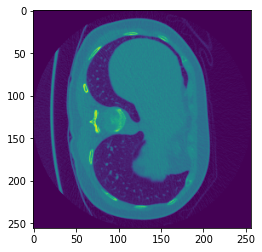

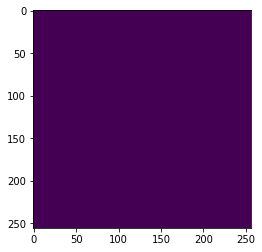


(256, 256)


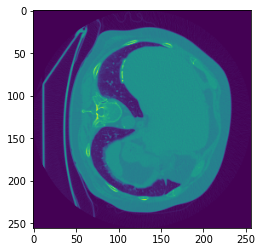

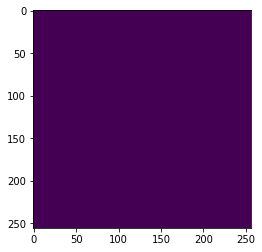


(256, 256)


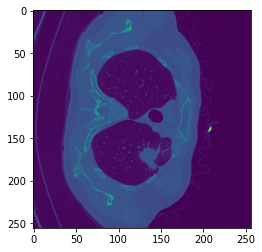

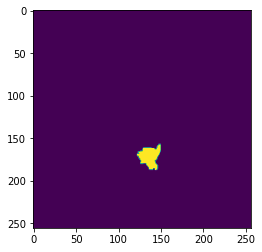


(256, 256)


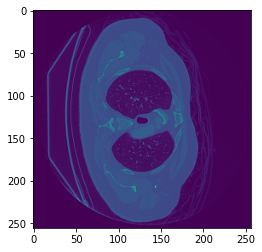

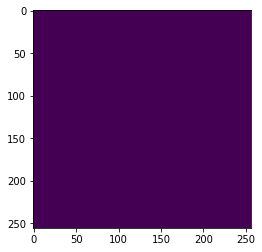


(256, 256)


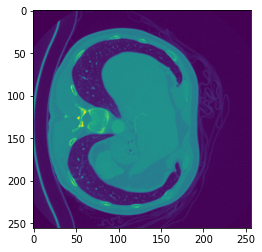

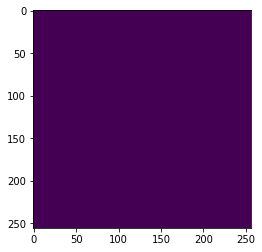


(256, 256)


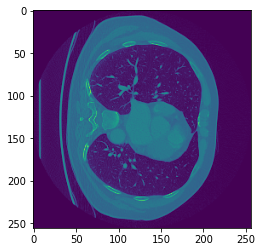

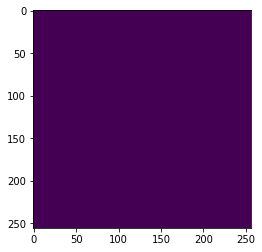


(256, 256)


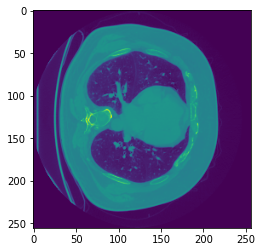

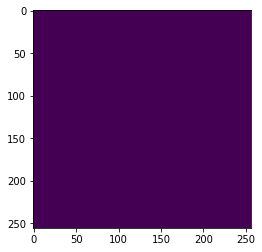


(256, 256)


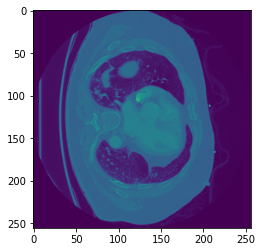

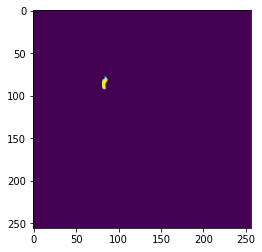


(256, 256)


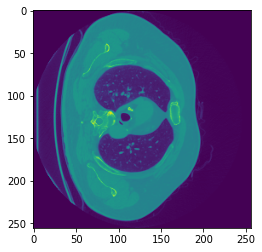

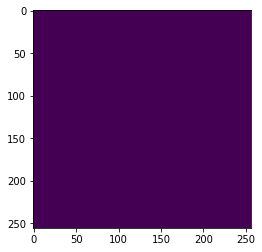

KeyboardInterrupt: Interrupted by user

In [10]:
import os

%run "Code_UNet_2/Preprocessing/Preprocess_dataset"